In [120]:
import opendatasets as od 
od.download("https://www.kaggle.com/datasets/vishardmehta/indian-engineering-college-placement-dataset")

Skipping, found downloaded files in ".\indian-engineering-college-placement-dataset" (use force=True to force download)


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV



In [122]:
df1= pd.read_csv("indian-engineering-college-placement-dataset/indian_engineering_student_placement.csv")
df2=pd.read_csv("indian-engineering-college-placement-dataset/placement_targets.csv")

In [123]:
df1.head()

,Student_ID,gender,branch,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,...,aptitude_skill_rating,hackathons_participated,certifications_count,sleep_hours,stress_level,part_time_job,family_income_level,city_tier,internet_access,extracurricular_involvement
0,1,Male,ECE,8.74,74.0,75.0,0,3.8,71.1,7,...,5,4,5,6.5,8,Yes,Medium,Tier 2,Yes,Medium
1,2,Female,ECE,7.80,75.3,69.7,0,6.3,69.5,5,...,3,4,1,7.1,8,Yes,Medium,Tier 3,Yes,Low
2,3,Female,IT,6.95,62.8,68.3,0,1.5,62.5,8,...,4,6,3,6.1,2,No,Low,Tier 2,Yes,High
3,4,Male,ECE,7.46,57.9,51.4,1,4.7,64.6,6,...,4,2,2,7.3,7,No,Medium,Tier 1,Yes,Low
4,5,Male,IT,6.86,61.3,73.5,2,5.2,75.9,3,...,3,2,1,6.0,7,No,Medium,Tier 1,Yes,Medium


In [124]:
df2.head()

,Student_ID,placement_status,salary_lpa
0,1,Placed,14.95
1,2,Placed,14.91
2,3,Placed,17.73
3,4,Placed,14.52
4,5,Placed,15.91


In [125]:
final_df = pd.merge(df1,df2,on="Student_ID")

In [126]:
final_df.head()

,Student_ID,gender,branch,cgpa,tenth_percentage,twelfth_percentage,backlogs,study_hours_per_day,attendance_percentage,projects_completed,...,certifications_count,sleep_hours,stress_level,part_time_job,family_income_level,city_tier,internet_access,extracurricular_involvement,placement_status,salary_lpa
0,1,Male,ECE,8.74,74.0,75.0,0,3.8,71.1,7,...,5,6.5,8,Yes,Medium,Tier 2,Yes,Medium,Placed,14.95
1,2,Female,ECE,7.80,75.3,69.7,0,6.3,69.5,5,...,1,7.1,8,Yes,Medium,Tier 3,Yes,Low,Placed,14.91
2,3,Female,IT,6.95,62.8,68.3,0,1.5,62.5,8,...,3,6.1,2,No,Low,Tier 2,Yes,High,Placed,17.73
3,4,Male,ECE,7.46,57.9,51.4,1,4.7,64.6,6,...,2,7.3,7,No,Medium,Tier 1,Yes,Low,Placed,14.52
4,5,Male,IT,6.86,61.3,73.5,2,5.2,75.9,3,...,1,6.0,7,No,Medium,Tier 1,Yes,Medium,Placed,15.91


In [127]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   5000 non-null   int64  
 1   gender                       5000 non-null   str    
 2   branch                       5000 non-null   str    
 3   cgpa                         5000 non-null   float64
 4   tenth_percentage             5000 non-null   float64
 5   twelfth_percentage           5000 non-null   float64
 6   backlogs                     5000 non-null   int64  
 7   study_hours_per_day          5000 non-null   float64
 8   attendance_percentage        5000 non-null   float64
 9   projects_completed           5000 non-null   int64  
 10  internships_completed        5000 non-null   int64  
 11  coding_skill_rating          5000 non-null   int64  
 12  communication_skill_rating   5000 non-null   int64  
 13  aptitude_skill_rating        

In [128]:
def clean_data(df):
    print("\nShape of the data:", df.shape)
    print("\nMissing data: ", final_df.isnull().sum())
    print("\nDuplicate data:", final_df.duplicated().sum())
    df=df.drop(columns="Student_ID")
    return df

In [129]:
final_df=clean_data(final_df)


Shape of the data: (5000, 25)

Missing data:  Student_ID                        0
gender                            0
branch                            0
cgpa                              0
tenth_percentage                  0
twelfth_percentage                0
backlogs                          0
study_hours_per_day               0
attendance_percentage             0
projects_completed                0
internships_completed             0
coding_skill_rating               0
communication_skill_rating        0
aptitude_skill_rating             0
hackathons_participated           0
certifications_count              0
sleep_hours                       0
stress_level                      0
part_time_job                     0
family_income_level               0
city_tier                         0
internet_access                   0
extracurricular_involvement    1006
placement_status                  0
salary_lpa                        0
dtype: int64

Duplicate data: 0


In [130]:
#extracurricular_involvement is a categorical variable and it has missing values. We can fill the missing values with the mode of the column.
final_df["extracurricular_involvement"] = final_df["extracurricular_involvement"].fillna(final_df["extracurricular_involvement"].mode()[0])

In [131]:
#unique values check
for col in final_df.columns:
    print(f"{col}: {final_df[col].nunique()}")

gender: 2
branch: 5
cgpa: 451
tenth_percentage: 478
twelfth_percentage: 479
backlogs: 6
study_hours_per_day: 99
attendance_percentage: 414
projects_completed: 9
internships_completed: 5
coding_skill_rating: 5
communication_skill_rating: 5
aptitude_skill_rating: 5
hackathons_participated: 7
certifications_count: 10
sleep_hours: 51
stress_level: 10
part_time_job: 2
family_income_level: 3
city_tier: 3
internet_access: 2
extracurricular_involvement: 3
placement_status: 2
salary_lpa: 1052


In [132]:
num_cols = [col for col in final_df.columns if final_df[col].dtype in ["int64", "float64"]]
cat_cols = [col for col in final_df.columns if final_df[col].dtype in ["object", "str"]]

In [133]:
num_cols, cat_cols

(['cgpa',
  'tenth_percentage',
  'twelfth_percentage',
  'backlogs',
  'study_hours_per_day',
  'attendance_percentage',
  'projects_completed',
  'internships_completed',
  'coding_skill_rating',
  'communication_skill_rating',
  'aptitude_skill_rating',
  'hackathons_participated',
  'certifications_count',
  'sleep_hours',
  'stress_level',
  'salary_lpa'],
 ['gender',
  'branch',
  'part_time_job',
  'family_income_level',
  'city_tier',
  'internet_access',
  'extracurricular_involvement',
  'placement_status'])

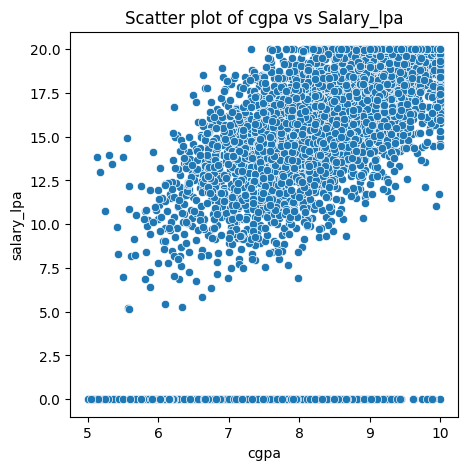

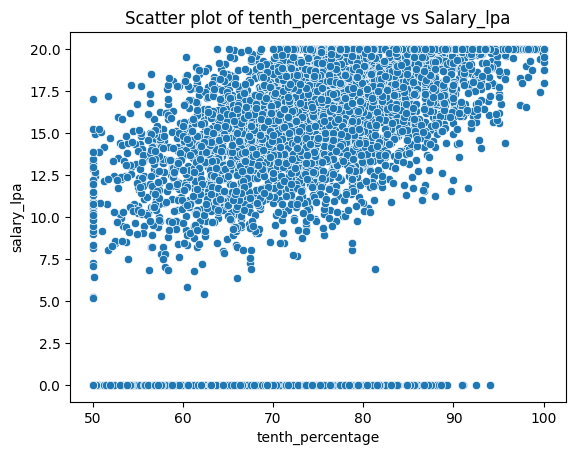

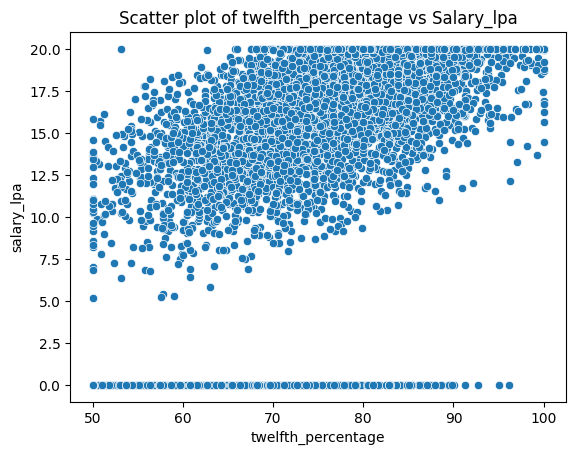

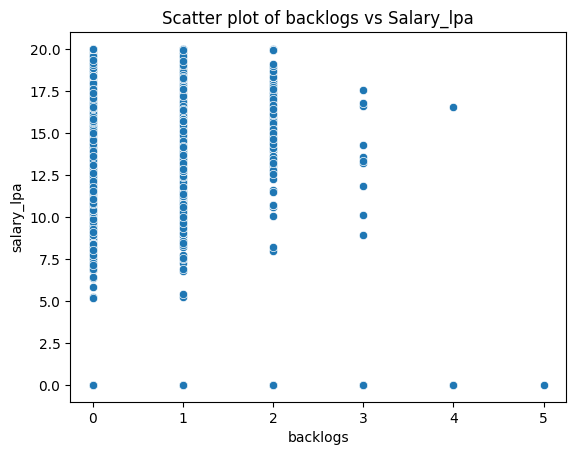

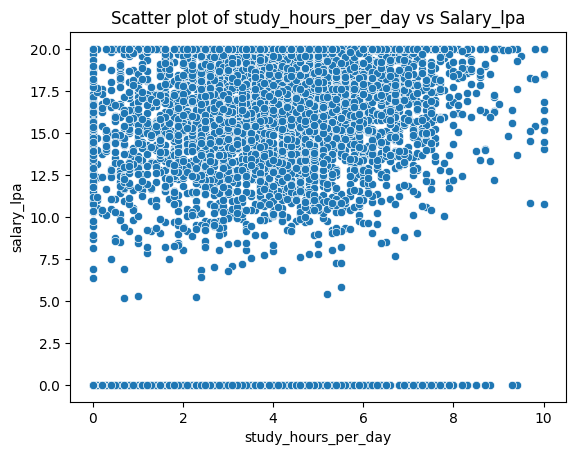

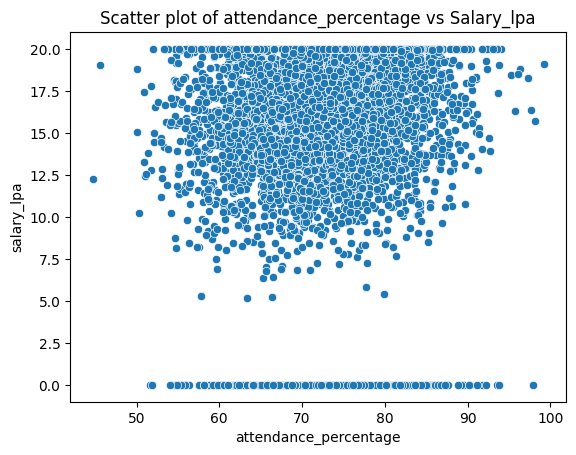

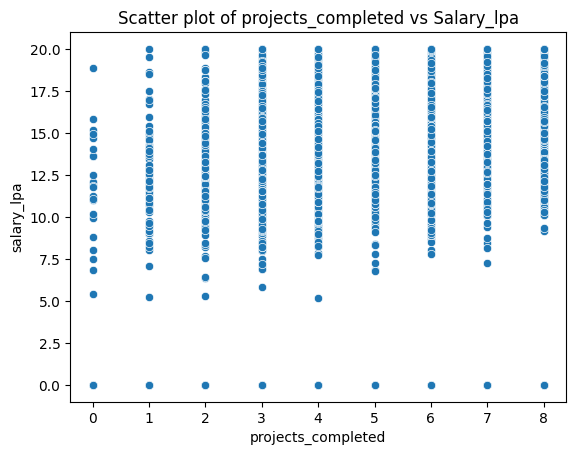

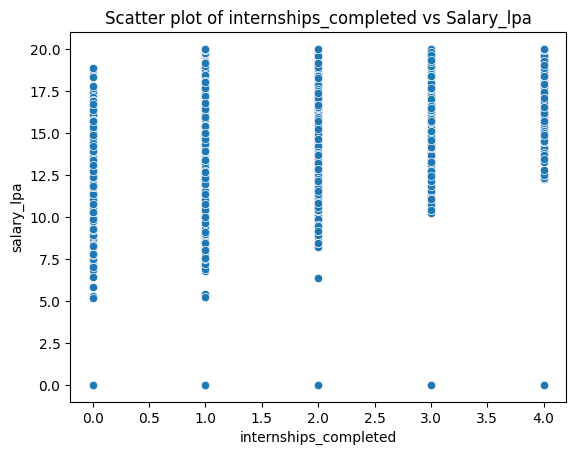

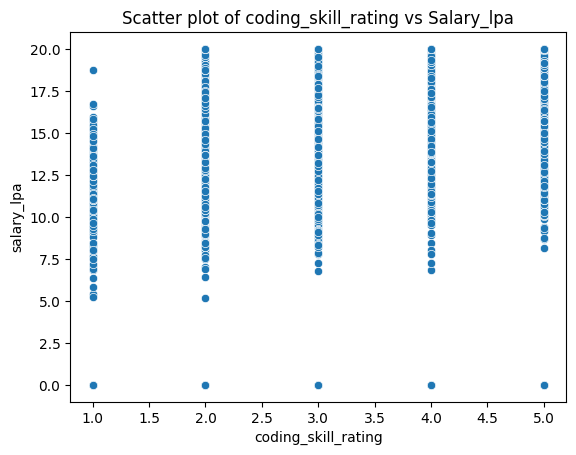

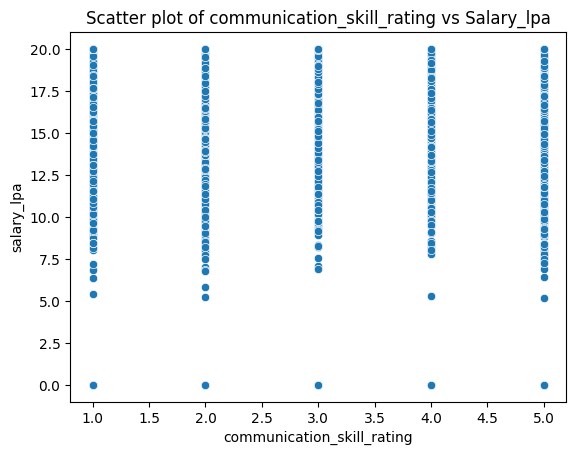

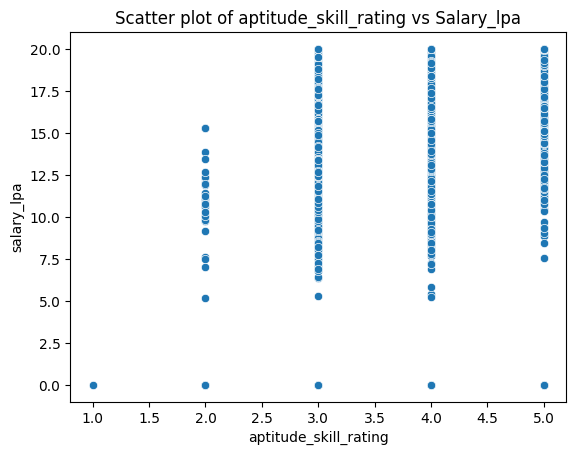

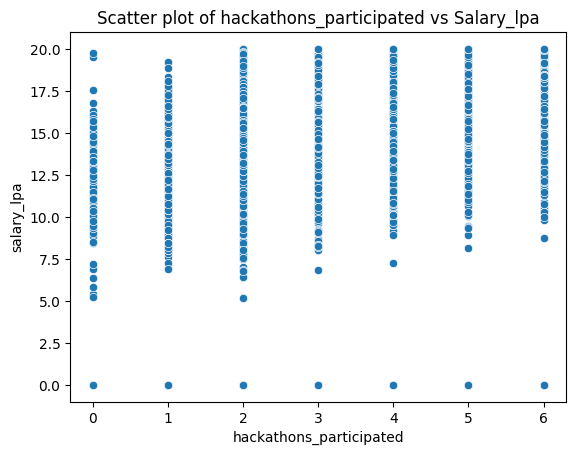

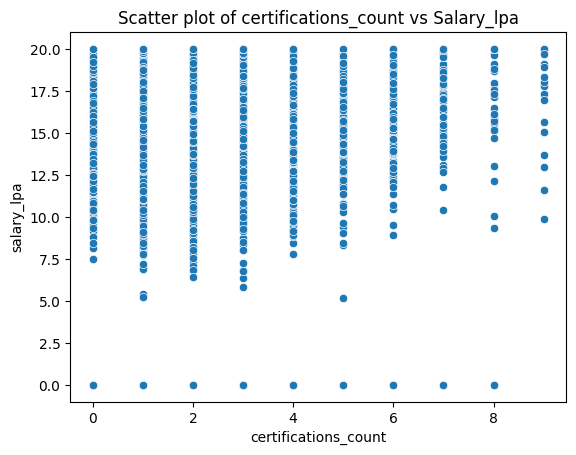

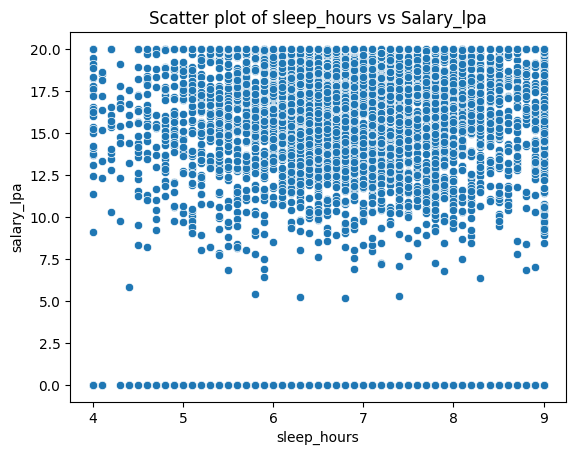

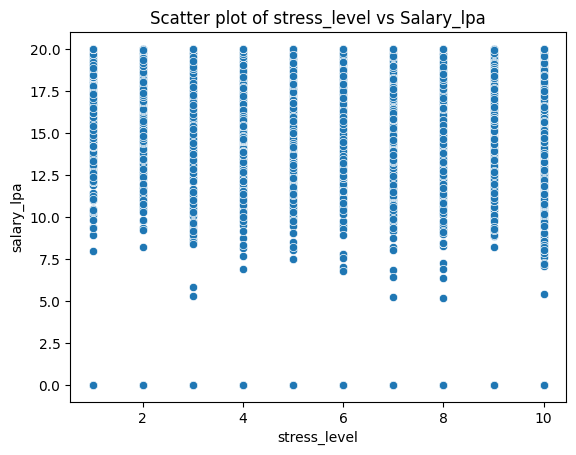

In [134]:
plt.figure(figsize=(5, 5))
for col in final_df.columns:
    if col in num_cols and col != "salary_lpa":
        sns.scatterplot(data=final_df, x=col, y="salary_lpa")
        plt.title(f"Scatter plot of {col} vs Salary_lpa")
        plt.show()

In [135]:
corr = final_df[num_cols].corr()

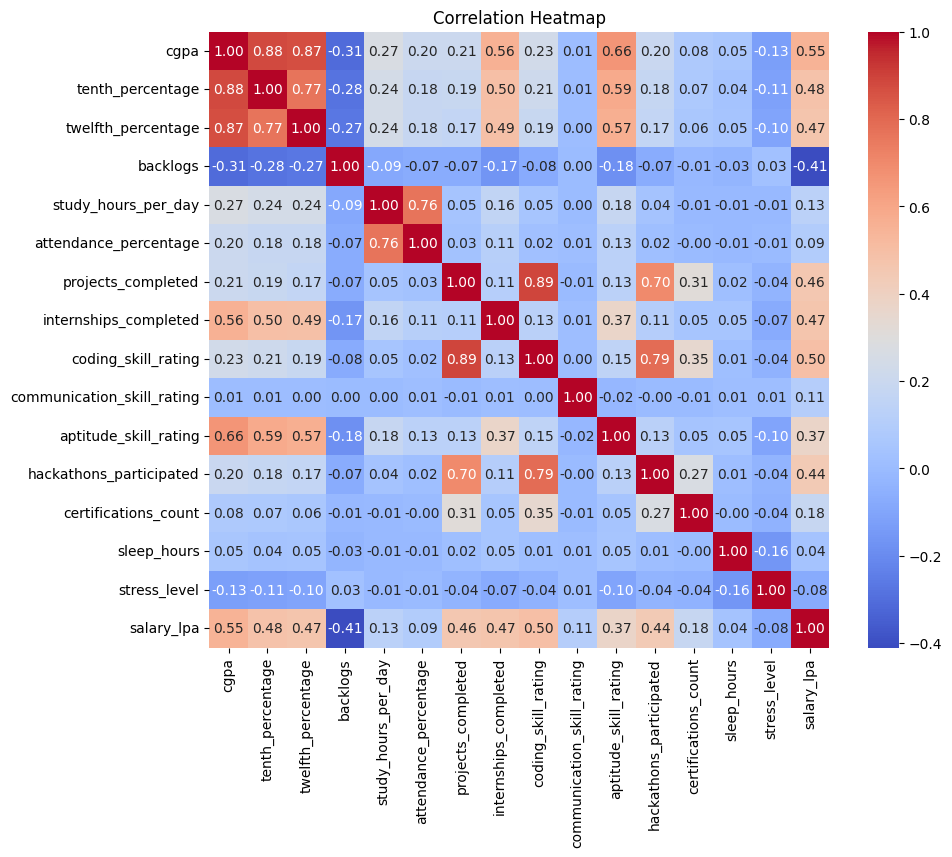

In [136]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

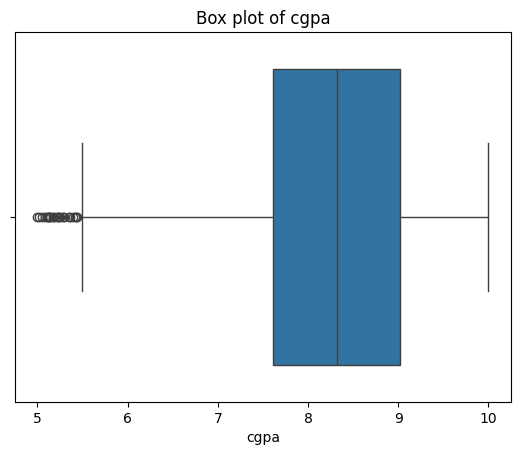

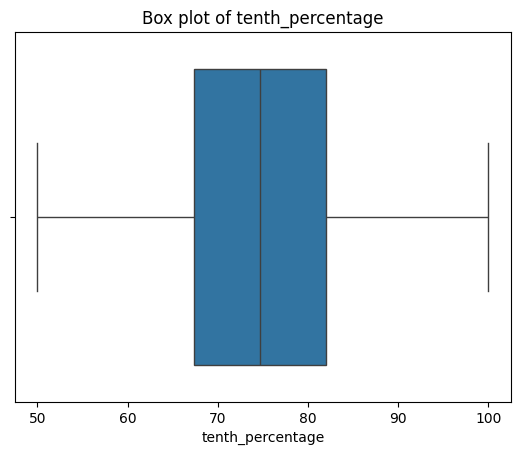

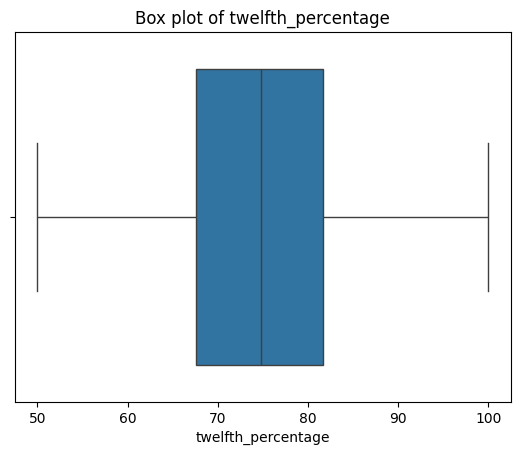

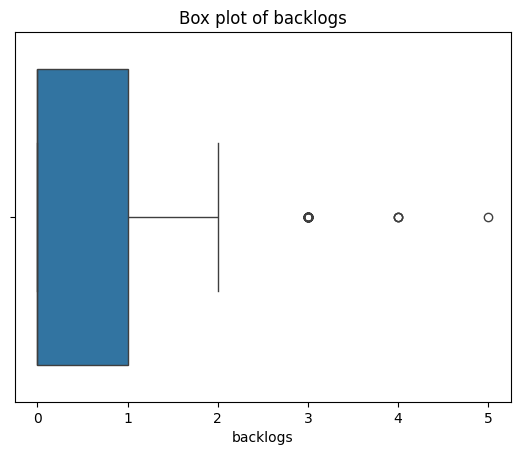

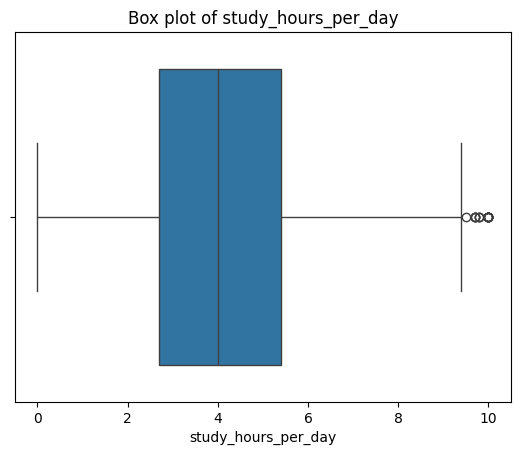

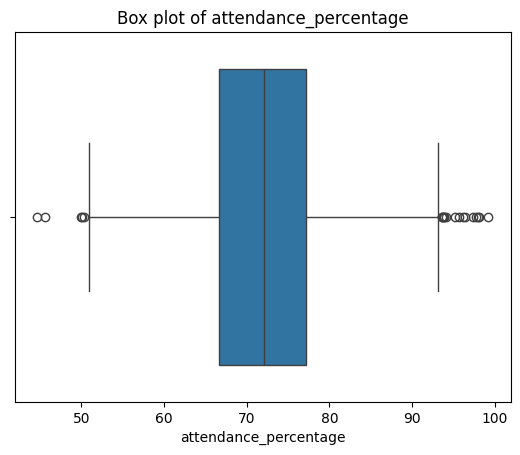

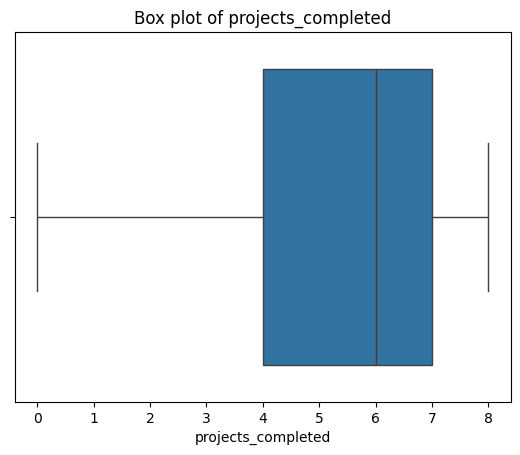

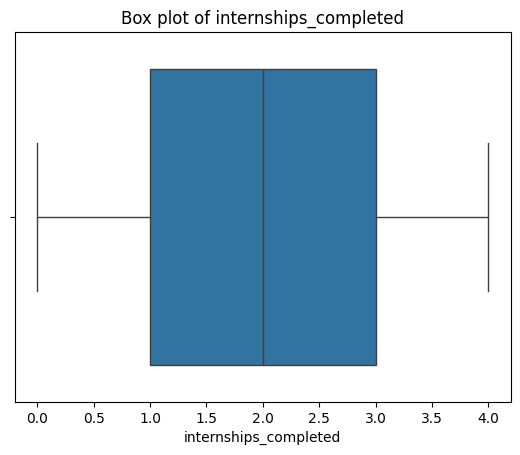

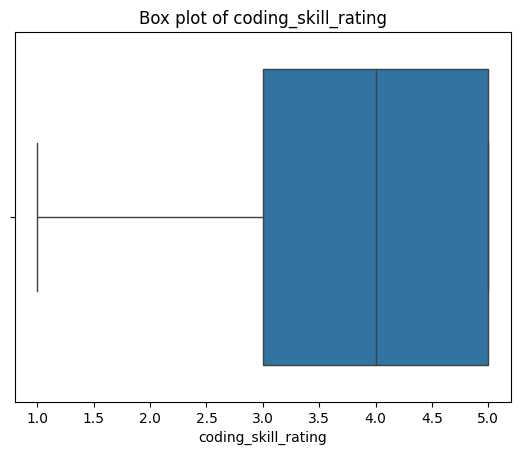

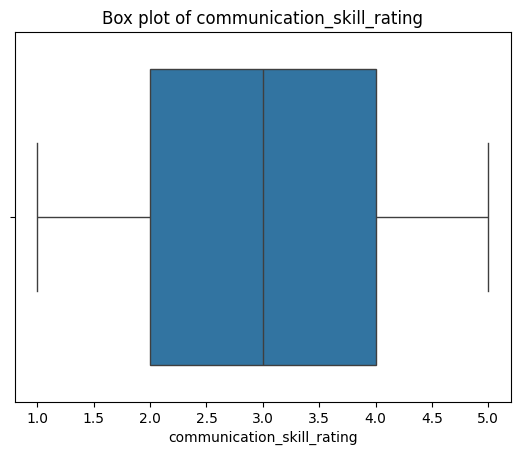

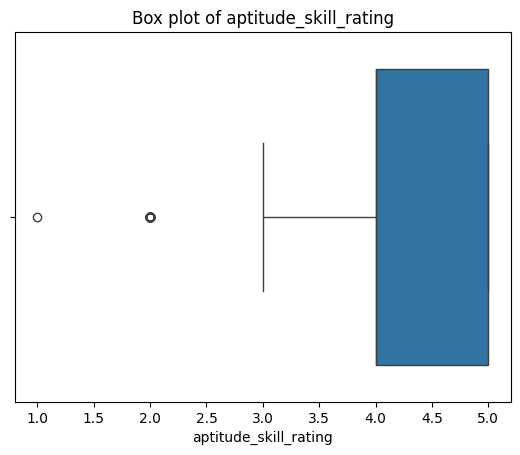

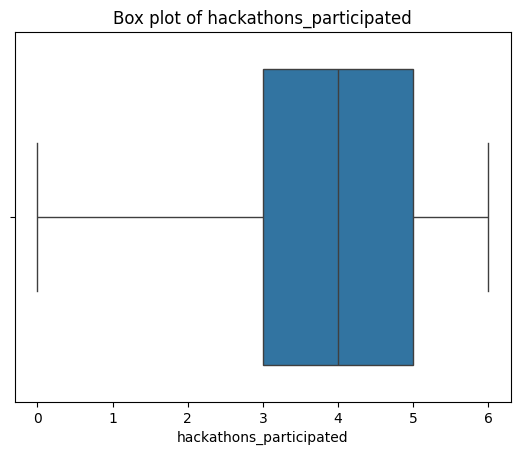

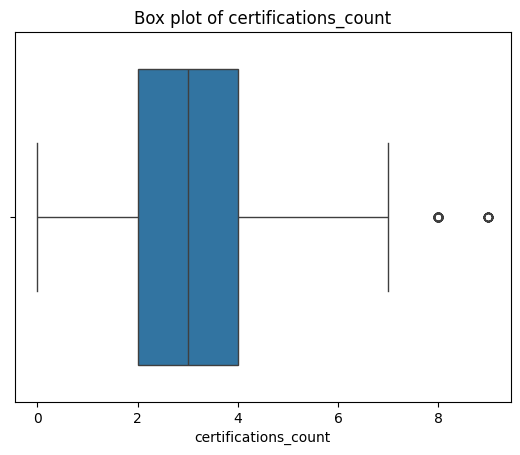

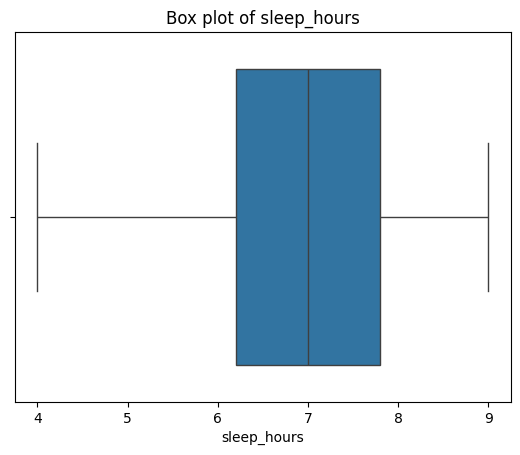

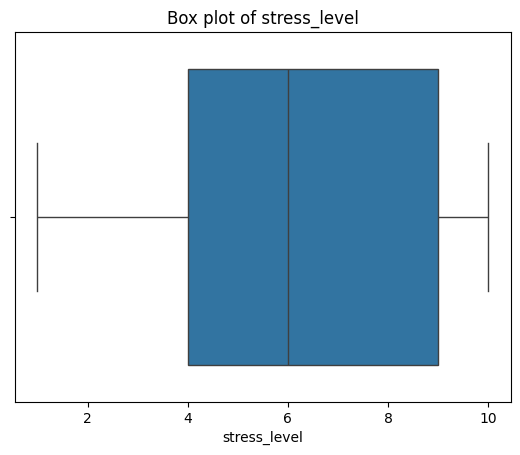

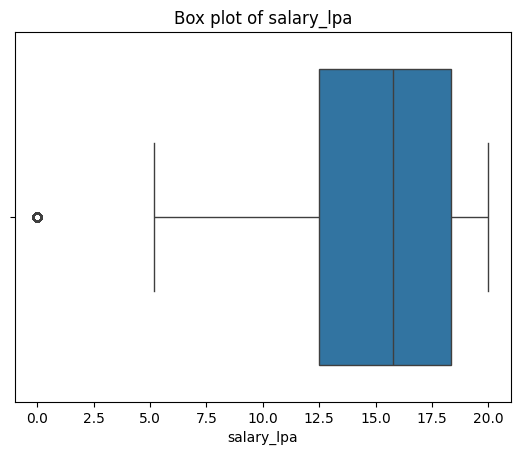

In [137]:
for col in num_cols:
    sns.boxplot(data=final_df, x=col)
    plt.title(f"Box plot of {col}")
    plt.show()

In [138]:
print("Before:", final_df.shape)

for col in num_cols:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    prev_shape = final_df.shape[0]
    final_df = final_df[(final_df[col] >= lower) & (final_df[col] <= upper)]
    print(f"{col}: removed {prev_shape - final_df.shape[0]} rows")

print("After:", final_df.shape)


Before: (5000, 24)
cgpa: removed 23 rows
tenth_percentage: removed 0 rows
twelfth_percentage: removed 0 rows
backlogs: removed 42 rows
study_hours_per_day: removed 20 rows
attendance_percentage: removed 16 rows
projects_completed: removed 0 rows
internships_completed: removed 0 rows
coding_skill_rating: removed 0 rows
communication_skill_rating: removed 0 rows
aptitude_skill_rating: removed 42 rows
hackathons_participated: removed 0 rows
certifications_count: removed 67 rows
sleep_hours: removed 0 rows
stress_level: removed 0 rows
salary_lpa: removed 626 rows
After: (4164, 24)


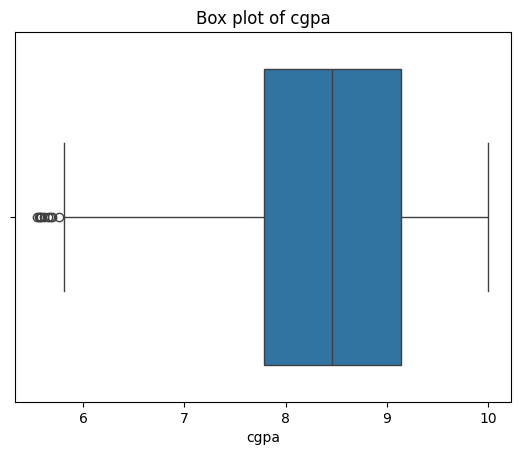

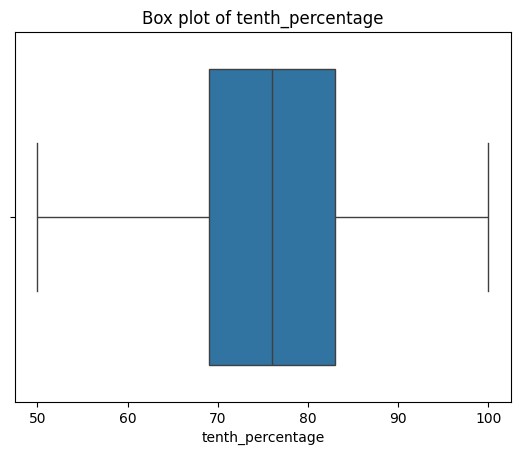

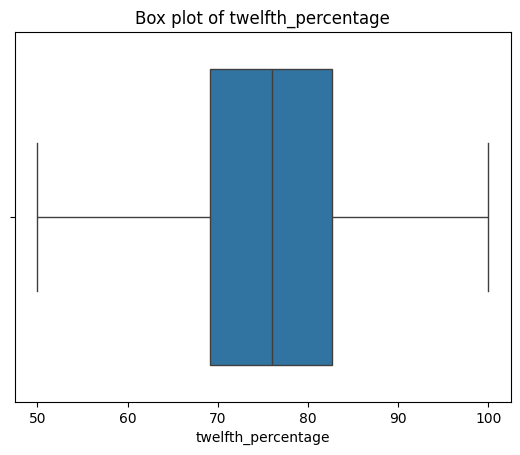

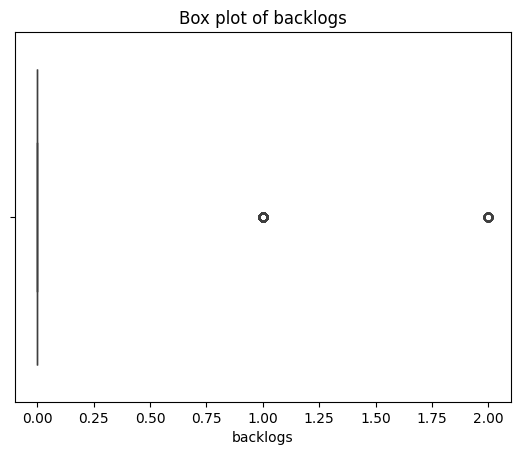

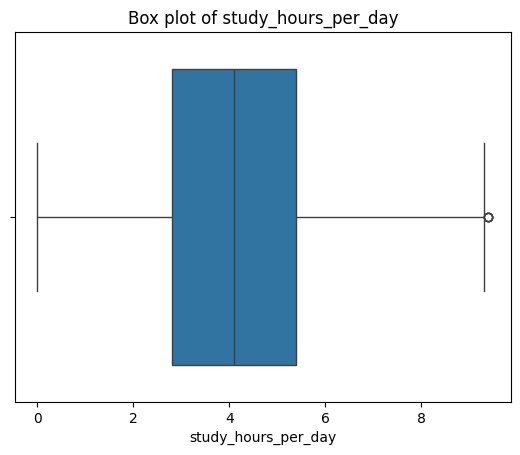

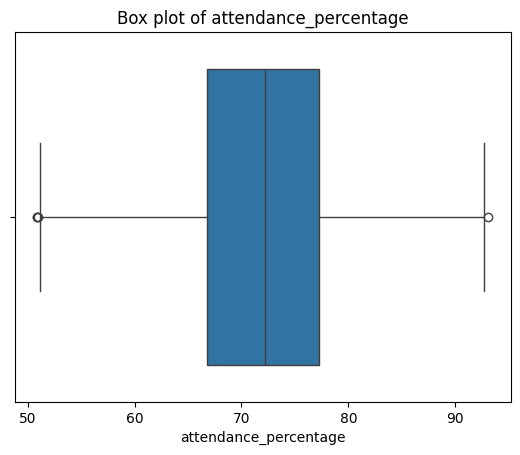

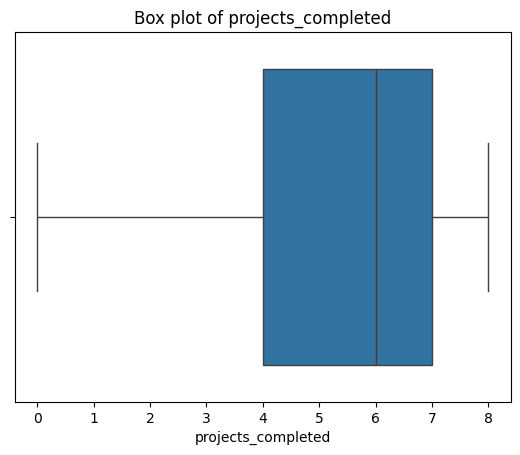

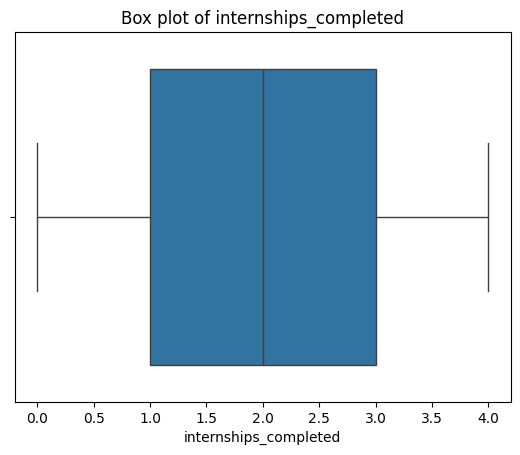

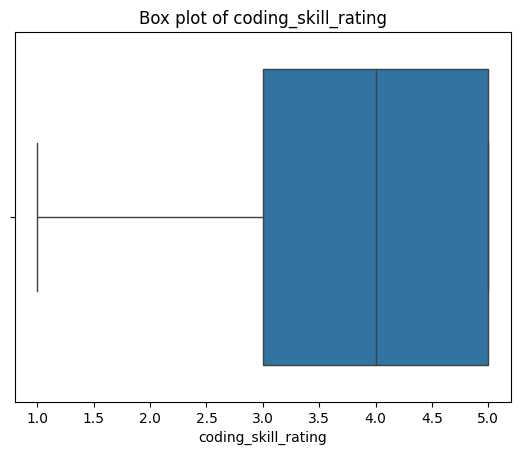

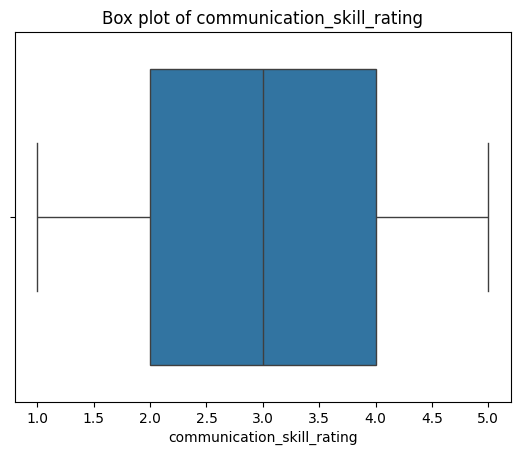

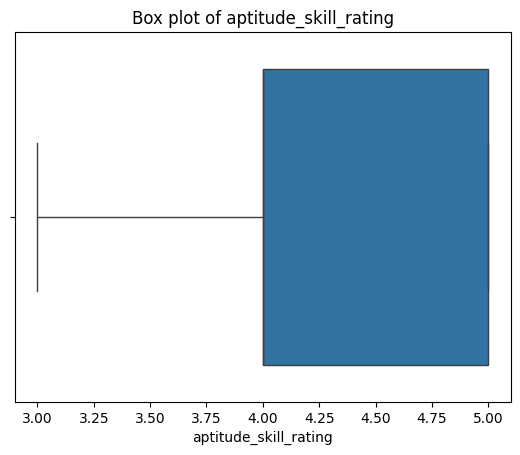

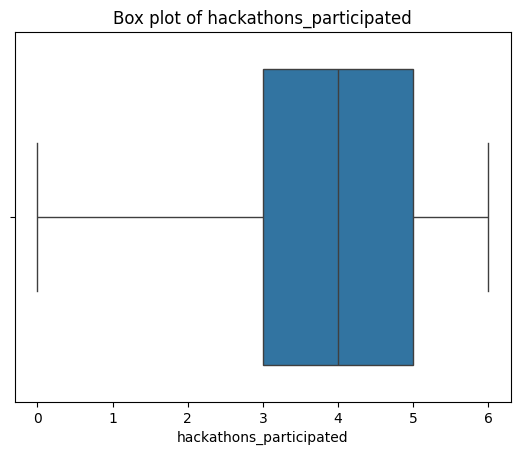

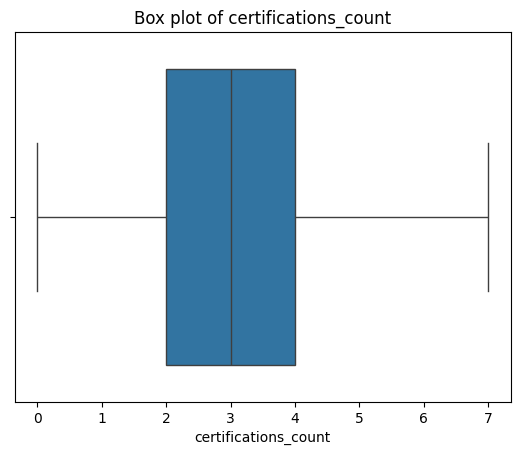

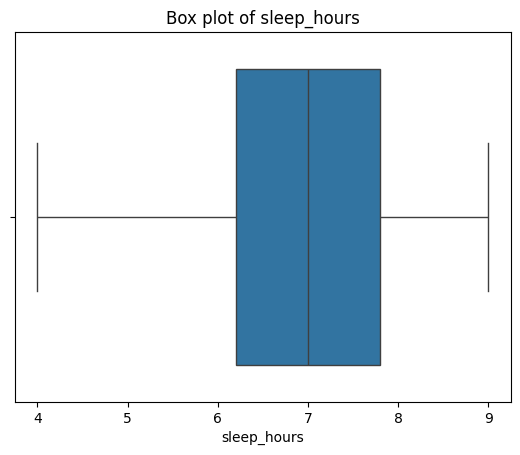

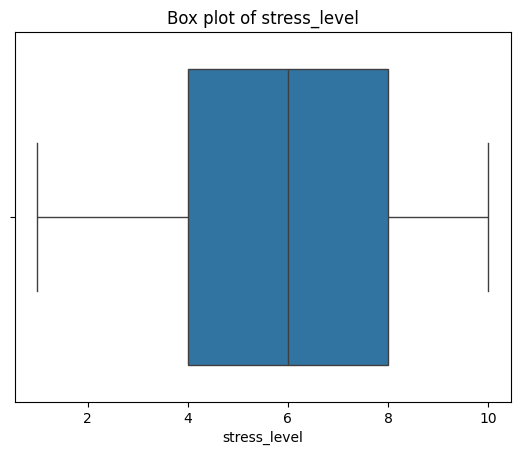

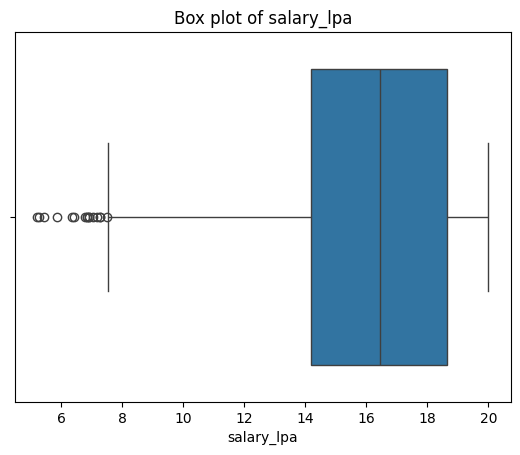

In [139]:
for col in num_cols:
    sns.boxplot(data=final_df, x=col)
    plt.title(f"Box plot of {col}")
    plt.show()

In [140]:
X = final_df.drop(columns="salary_lpa")
y = final_df["salary_lpa"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [157]:
transformer = ColumnTransformer(transformers=[
    ("num", StandardScaler(), [col for col in num_cols if col != "salary_lpa"]),
    ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_cols)
])

In [158]:
#Linear Regression
lr_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", LinearRegression())
])

In [159]:
lr_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers con

In [163]:
#with elastic net regression
en_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", ElasticNet(
        max_iter=5000
        
    ))
])

en_params_grid = {
    "model__alpha": [0.001, 0.01, 0.1, 1, 10],
    "model__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1.0]
}
elastic_grid = GridSearchCV(
    estimator=en_pipeline,
    param_grid=en_params_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)


In [164]:

elastic_grid.fit(X_train, y_train)
print("Best ElasticNet params:", elastic_grid.best_params_)

Best ElasticNet params: {'model__alpha': 0.01, 'model__l1_ratio': 1.0}


In [165]:
#knn regressor
knn_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", KNeighborsRegressor())
])

knn_param_grid = {
    "model__n_neighbors": [3,5,7,9,11],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]
}

knn_grid = GridSearchCV(
    estimator = knn_pipeline,
    param_grid = knn_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)




In [166]:
knn_grid.fit(X_train, y_train)
print("Best KNN params:", knn_grid.best_params_)

Best KNN params: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'distance'}


In [167]:
#decision tree regressor
dt_pipeline = Pipeline([
    ("transformer", transformer),
    ("model", DecisionTreeRegressor())
])

dt_param_grid = {
    "model__max_depth": [3, 5, 7, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

dt_grid = GridSearchCV(
    estimator = dt_pipeline,
    param_grid = dt_param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)
print("Best Decision Tree params:", dt_grid.best_params_)

Best Decision Tree params: {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}


In [169]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

print("Linear Regression:", evaluate_model(lr_pipeline, X_test, y_test))
print("ElasticNet:", evaluate_model(elastic_grid.best_estimator_, X_test, y_test))
print("KNN:", evaluate_model(knn_grid.best_estimator_, X_test, y_test))
print("Decision Tree:", evaluate_model(dt_grid.best_estimator_, X_test, y_test))

Linear Regression: (2.3907211363451304, 0.7332228298958733)
ElasticNet: (2.383224831622215, 0.7340593318742157)
KNN: (2.912623948899157, 0.6749844376024914)
Decision Tree: (3.223139784175536, 0.6403344173436698)
